## VQA - create dataset with complementary images

In [2]:
import json
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

import pickle

### Load Data

In [3]:
dataDir = '/Users/pratikrev/Desktop/Neural Networks and Deep Learning/Project/Data/'

dataFiles = {
    'Validation': {
        'imageFile': 'val2014/',
        'questionFile': 'v2_OpenEnded_mscoco_val2014_questions.json',
        'compListFile': 'v2_mscoco_val2014_complementary_pairs.json',
        'explanationFile': 'VQA-E_val_set.json'
    },
    'Train': {
        'imageFile': 'train2014/',
        'questionFile': 'v2_OpenEnded_mscoco_train2014_questions.json',
        'compListFile': 'v2_mscoco_train2014_complementary_pairs.json',
        'explanationFile': 'VQA-E_train_set.json'
    }
}

dataType = 'Train'

In [4]:
# load data files
def loadData(path, dataType):
    path += dataType + '/'
    # get images
#     image_file = path + dataFiles[dataType]['imageFile']
#     _images = [img for img in listdir(image_file) if isfile(join(image_file, img))]
    
    # get questions
    question_file = path + dataFiles[dataType]['questionFile']
    _questions = json.load(open(question_file, 'r'))['questions']
    
    # get complementary pairs list
    comp_pair_file = path + dataFiles[dataType]['compListFile']
    _comp_pairs = json.load(open(comp_pair_file, 'r'))
    
    # get vqa-e dataset
    explanation_file = path + dataFiles[dataType]['explanationFile']
    _explanations = json.load(open(explanation_file, 'r'))
    
    return _questions, _comp_pairs, _explanations

questions, comp_pairs, explanations = loadData(dataDir, dataType)

In [5]:
# print(f'Images: {len(images)}')
print(f'Questions: {len(questions)}')
print(f'Complementary Pairs: {len(comp_pairs)}')
print(f'Explanations: {len(explanations)}')

Questions: 443757
Complementary Pairs: 200394
Explanations: 181298


### Dataset with Complementary Images

In [6]:
# dataset = []

# for data in tqdm(explanations):
#     # get data fields
#     imgId = data['img_id']
#     question = data['question']
    
#     # get question_id_1 from input imgId and question
#     img_question = list(filter(lambda x:x['image_id']==imgId and x['question']==question,questions))
#     question_id_1 = img_question[0]['question_id']

#     # get complementary pair question_id_2
#     for pair in comp_pairs:
#         if question_id_1 in pair:
#             question_id_2 = list(filter(lambda x : x != question_id_1, pair))[0]

#     # get image_id from questions with question_id == question_id_2
#     comp_question = list(filter(lambda x:x['question_id']==question_id_2,questions))
#     comp_img_id = comp_question[0]['image_id']
    
#     # copy old fields
#     data2 = data.copy()
#     # add new field
#     data2['comp_img_id'] = comp_img_id
    
#     dataset.append(data2)

In [7]:
# # save dataset
# with open(dataDir + dataType + '/VQA-E-C.json', 'w') as f:
#     json.dump(dataset, f)

In [8]:
# load dataset
with open(dataDir + dataType + '/VQA-E-ComplementaryImages_train.json') as f:
    dataset = json.load(f)
    
# load missing data
with open(dataDir + dataType + '/comp_img_missing_qid.json') as f:
    missing = json.load(f)

In [9]:
print(len(explanations), len(dataset), len(missing))

181298 160656 20642


In [24]:
# Sample input image and question from VQA-E dataset (explanations)

# data = np.random.choice(dataset)
# imgId = data['img_id']
# compImgId = data['comp_img_id']
# question = data['question']
# answer = data['multiple_choice_answer']
# explanation = data['explanation']

''' OR '''

img_id = 324483
for data in dataset:
    if data['img_id'] == img_id:
        imgId = data['img_id']
        compImgId = data['comp_img_id']
        question = data['question']
        answer = data['multiple_choice_answer']
        explanation = data['explanation'] 

Question: Is the cat sitting in a suitcase?
Answer: yes
Explanation: A fluffy cat is poking its head out from a suitcase.
Explanation Confidence: 0.7178816215501382


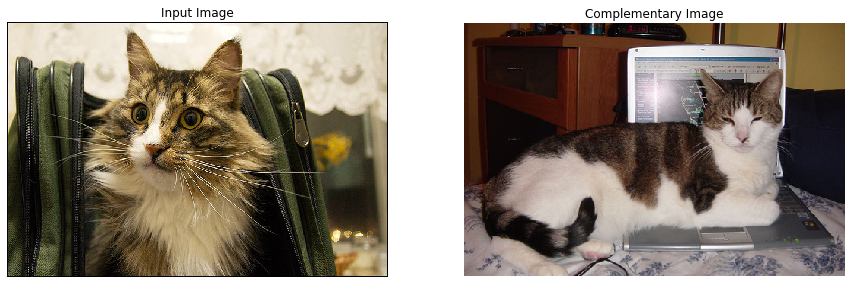

In [25]:
sampleOutput(imgId, compImgId, dataType)

In [12]:
# Helper Functions

def buildImgString(imgId, imageFile):
    imgString = str(imgId).zfill(12)
    imgString = 'COCO_' + imageFile + '_' + imgString + '.jpg'
    return imgString

def sampleOutput(inputImgId, compImgId, dataType):
    
    print(f'Question: {question}')
    print(f'Answer: {answer}')
    print(f'Explanation: {explanation[0]}')
    print(f'Explanation Confidence: {explanation[1]}')

    imageFile = {'Validation': 'val2014', 'Train': 'train2014'}
    # get input image
    ioString = buildImgString(inputImgId, imageFile[dataType])
    # get complementary image
    icString = buildImgString(compImgId, imageFile[dataType])
    
    IO = Image.open(dataDir + dataType + '/' + dataFiles[dataType]['imageFile'] + ioString)
    IC = Image.open(dataDir + dataType + '/' + dataFiles[dataType]['imageFile'] + icString)
  
    # plot images
    fig = plt.figure(figsize=(15,15))
    ax1 = fig.add_subplot(2,2,1)
    ax1.set_title('Input Image')
    ax1.set_axis_off()
    ax1.imshow(IO)
    ax2 = fig.add_subplot(2,2,2)
    ax2.set_title('Complementary Image')
    ax2.set_axis_off()
    ax2.imshow(IC)